# **Case Studies in Artificial Intelligence and Machine Learning**
# Group-2




#### **Problem statement:**  
Air pollution (PM2.5) threatens public health, productivity, and regulatory compliance. Businesses and policymakers must adopt data-driven solutions to mitigate risks and optimize air quality management.  

#### **Current vs. Ideal State:**  
- **Ideal:** PM2.5 levels ≤ **9.0 µg/m³** (EPA, 2024).  
- **Current:** **10.0 µg/m³** (2022).  
- **Gap:** **10% (1.0 µg/m³)** reduction needed.  

#### **Key Objectives & Business Impact:**  
1. **Regulatory Compliance & Cost Savings** – Support EPA and WHO standards, reducing fines and healthcare costs.  
2. **AI-Driven Decision Making** – Use machine learning to predict and mitigate pollution sources.  
3. **Sustainability & CSR** – Improve environmental responsibility and public trust.  

#### **Strategic Actions:**  
- Implement **AI-based real-time monitoring**.  
- Optimize industrial & transportation emissions.  
- Foster **public-private partnerships** for sustainable air quality policies.  
  
- Predictive Emission Modeling: AI predicts emission levels based on historical and real-time industrial data.

This project provides a **business case for AI-powered air pollution control**, ensuring compliance, cost efficiency, and public health benefits.

In [1]:
! pip install pandas numpy scipy seaborn matplotlib
! pip install -U scikit-learn
! pip install --upgrade pip


  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


# 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, shapiro, levene, wilcoxon


# 2. Load the Dataset

In [3]:
import pandas as pd

# Load the dataset
file_path = "data/ad_viz_plotval_data (2).csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            1532 non-null   object 
 1   Source                          1532 non-null   object 
 2   Site ID                         1532 non-null   int64  
 3   POC                             1532 non-null   int64  
 4   Daily Mean PM2.5 Concentration  1532 non-null   float64
 5   Units                           1532 non-null   object 
 6   Daily AQI Value                 1532 non-null   int64  
 7   Local Site Name                 1532 non-null   object 
 8   Daily Obs Count                 1532 non-null   int64  
 9   Percent Complete                1532 non-null   float64
 10  AQS Parameter Code              1532 non-null   int64  
 11  AQS Parameter Description       1532 non-null   object 
 12  Method Code                     15

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2019,AQS,110010041,1,3.5,ug/m3 LC,19,RIVER TERRACE,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.895572,-76.958072
1,01/02/2019,AQS,110010041,1,4.1,ug/m3 LC,23,RIVER TERRACE,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.895572,-76.958072
2,01/03/2019,AQS,110010041,1,7.0,ug/m3 LC,39,RIVER TERRACE,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.895572,-76.958072
3,01/04/2019,AQS,110010041,1,12.1,ug/m3 LC,57,RIVER TERRACE,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.895572,-76.958072
4,01/05/2019,AQS,110010041,1,5.8,ug/m3 LC,32,RIVER TERRACE,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.895572,-76.958072


#  Data Wrangling

# 3.1 Convert Dates

In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')


# 3.2 Check and Handle Missing Values

In [6]:
missing_summary = df.isnull().sum()
print(missing_summary)

# Optionally drop or fill missing
df.dropna(inplace=True)  # or use df.fillna(method='ffill') if needed


Date                              0
Source                            0
Site ID                           0
POC                               0
Daily Mean PM2.5 Concentration    0
Units                             0
Daily AQI Value                   0
Local Site Name                   0
Daily Obs Count                   0
Percent Complete                  0
AQS Parameter Code                0
AQS Parameter Description         0
Method Code                       0
Method Description                0
CBSA Code                         0
CBSA Name                         0
State FIPS Code                   0
State                             0
County FIPS Code                  0
County                            0
Site Latitude                     0
Site Longitude                    0
dtype: int64


# 3.3 Remove Duplicates

In [7]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            1532 non-null   object 
 1   Source                          1532 non-null   object 
 2   Site ID                         1532 non-null   int64  
 3   POC                             1532 non-null   int64  
 4   Daily Mean PM2.5 Concentration  1532 non-null   float64
 5   Units                           1532 non-null   object 
 6   Daily AQI Value                 1532 non-null   int64  
 7   Local Site Name                 1532 non-null   object 
 8   Daily Obs Count                 1532 non-null   int64  
 9   Percent Complete                1532 non-null   float64
 10  AQS Parameter Code              1532 non-null   int64  
 11  AQS Parameter Description       1532 non-null   object 
 12  Method Code                     15

# 4. Exploratory Data Analysis (EDA)

# 4.1 Summary Statistics

In [8]:
df['Daily Mean PM2.5 Concentration'].describe()


count    1532.000000
mean        8.240601
std         4.962766
min        -1.800000
25%         5.100000
50%         7.400000
75%        10.425000
max        67.500000
Name: Daily Mean PM2.5 Concentration, dtype: float64

# 4.2 Line Plot Over Time

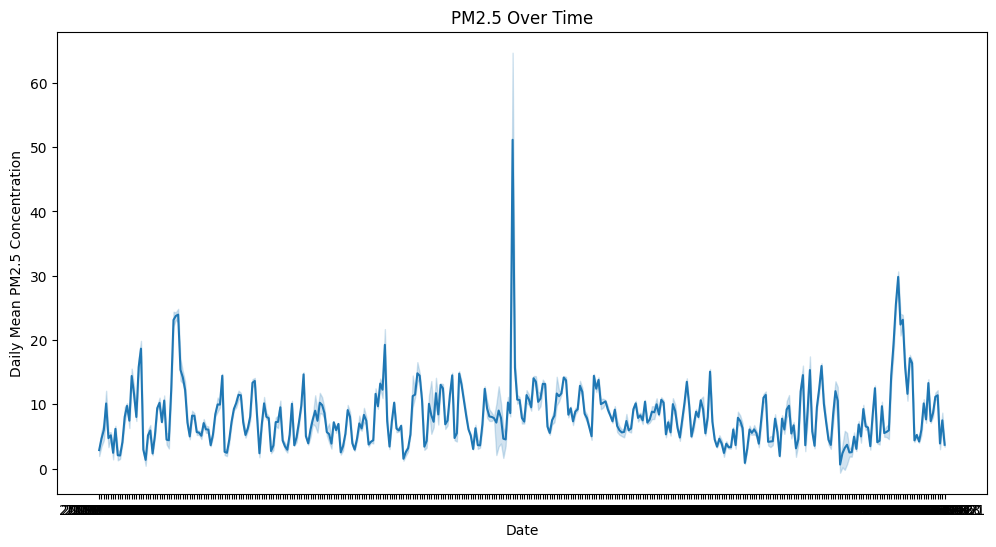

In [9]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Daily Mean PM2.5 Concentration', data=df)
plt.title('PM2.5 Over Time')
plt.show()


# 4.3 Histogram

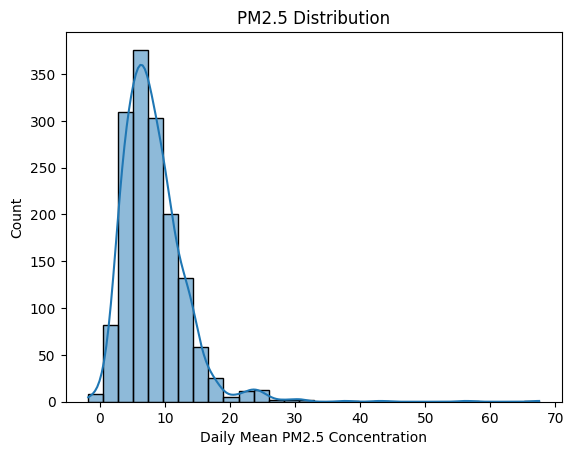

In [10]:
sns.histplot(df['Daily Mean PM2.5 Concentration'], bins=30, kde=True)
plt.title('PM2.5 Distribution')
plt.show()


# 4.4 Boxplot for Outliers

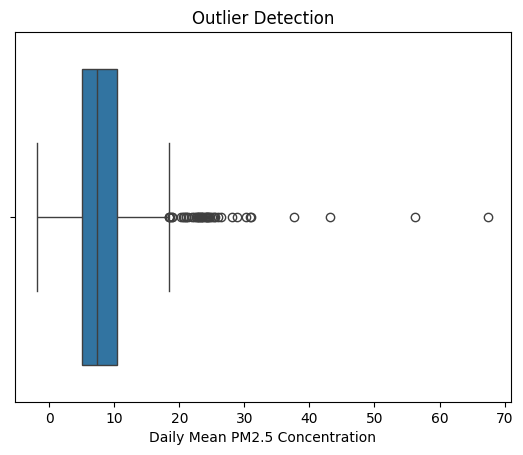

In [11]:
sns.boxplot(x=df['Daily Mean PM2.5 Concentration'])
plt.title('Outlier Detection')
plt.show()


# 4.5 Correlation Heatmap

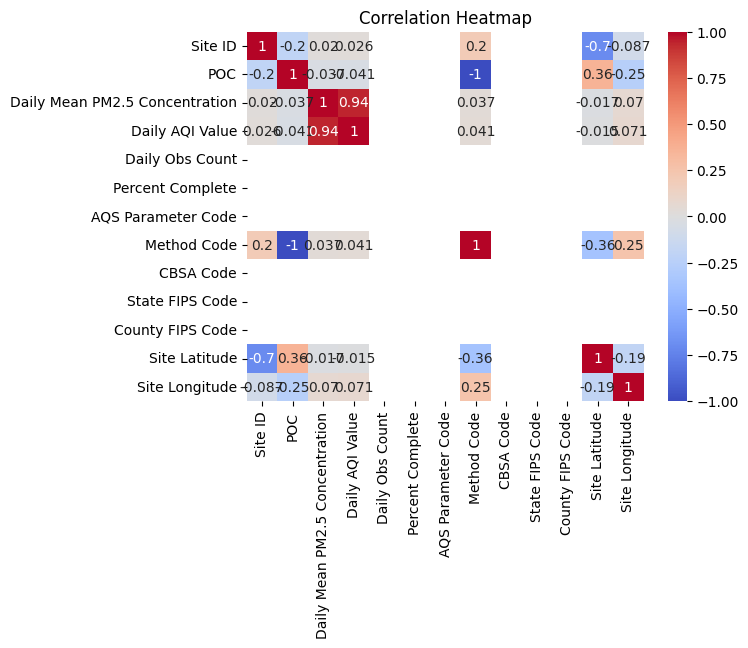

In [12]:
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# 5. Prepare for A/B Testing

# 5.1 Group Data by Method Code

In [13]:
group_a = df[df['Method Code'] == 209]['Daily Mean PM2.5 Concentration']
group_b = df[df['Method Code'] == 145]['Daily Mean PM2.5 Concentration']


In [14]:
print("Shapiro Test - Group A:", shapiro(group_a))
print("Shapiro Test - Group B:", shapiro(group_b))


Shapiro Test - Group A: ShapiroResult(statistic=0.829677487402819, pvalue=1.6600757251618783e-36)
Shapiro Test - Group B: ShapiroResult(statistic=0.8347860501368818, pvalue=2.3005612923996476e-09)


- Since both p-values are < 0.05, the data in both groups is not normally distributed.

# 6. A/B Test: T-test or Wilcoxon

In [15]:
t_stat, p_val = ttest_ind(group_a, group_b, equal_var=False)
print("T-Test Result: t =", t_stat, ", p =", p_val)


T-Test Result: t = 1.6045673093688508 , p = 0.11119078554501238


In [16]:
w_stat, p_val = wilcoxon(group_a.sample(100), group_b.sample(100))  # equal size samples
print("Wilcoxon Test Result: stat =", w_stat, ", p =", p_val)


Wilcoxon Test Result: stat = 1723.5 , p = 0.008716369205340458


- The p-value is < 0.05, so we will reject the null hypothesis.
- There is a statistically significant difference between the two groups → the method used to measure PM2.5 likely affects the recorded values.

# 7. Interpretation

In [17]:
alpha = 0.05
if p_val < alpha:
    print("Reject Null Hypothesis: There is a significant difference.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference.")


Reject Null Hypothesis: There is a significant difference.


In [18]:
# Save to CSV in the same directory
df.to_csv('cleaned_pm25_dataset.csv', index=False)

print("Cleaned dataset saved as 'cleaned_pm25_dataset.csv'")


Cleaned dataset saved as 'cleaned_pm25_dataset.csv'


# Spearman's Rank Correlation

In [19]:
# Load the original dataset again
import pandas as pd
from scipy.stats import spearmanr

# Load the dataset
df = pd.read_csv("cleaned_pm25_dataset.csv")

# Clean the dataset: drop rows with missing values in relevant columns
df_clean = df[['Daily Mean PM2.5 Concentration', 'Daily AQI Value']].dropna()

# Perform Spearman Rank Correlation
corr, p_value = spearmanr(df_clean['Daily Mean PM2.5 Concentration'], df_clean['Daily AQI Value'])

corr, p_value


(0.9997991445116221, 0.0)

The Spearman correlation between PM2.5 concentration and AQI value is extremely strong (ρ ≈ 1.0), indicating a near-perfect positive monotonic relationship.

The p-value = 0.0, meaning this result is statistically significant.

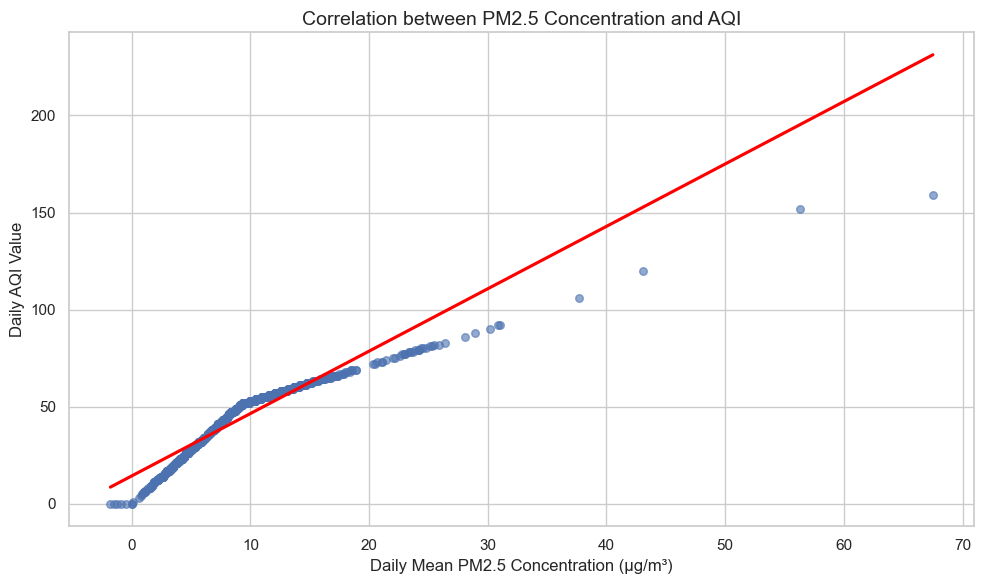

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Daily Mean PM2.5 Concentration',
    y='Daily AQI Value',
    data=df_clean,
    scatter_kws={'s': 30, 'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=None
)

# Add titles and labels
plt.title('Correlation between PM2.5 Concentration and AQI', fontsize=14)
plt.xlabel('Daily Mean PM2.5 Concentration (µg/m³)', fontsize=12)
plt.ylabel('Daily AQI Value', fontsize=12)
plt.tight_layout()
plt.show()



---

### **1. Spearman Rank Correlation**
- **Purpose:** Measures the **strength and direction** of a **monotonic relationship** between two continuous or ordinal variables.
- **Used for:** Correlation between **PM2.5** and **AQI**.
- **Output:** Correlation coefficient (ρ) and p-value.
- **Result:** ρ = **0.9998**, p = **0.0** → very strong positive correlation.

 **Best when**: You want to see **how closely two variables move together**, especially when data is **not normally distributed**.

---

### **2. Wilcoxon Rank-Sum Test**
- **Purpose:** Compares **two independent groups** to test whether their population medians are significantly different.
- **Used for:** Comparing **PM2.5 levels measured by Method 209 vs Method 145**.
- **Output:** Test statistic and p-value.
- **Result:** stat = **1723.5**, p = **0.0087** → significant difference between groups.

 **Best when**: You want to know if **two groups are statistically different**, especially when data is **non-normal**.

---

### Final Answer:
**Both tests are valuable — but for different purposes**:

- Use **Spearman** when you're analyzing **correlation** or relationship.
- Use **Wilcoxon** when you're comparing **groups** (like A/B testing).

